# Churn Prediction Project

## Introduction
The aim of the project is to predict which customers of a bank will leave their credit card service. To be able do that we use 17 different variables: the response variable “Attrition_Flag”, and the 16 predictor variables divided in demographic variables and variables (product).


## Methods
First, we thought about which algorithm best fitted the request: we were asked to make a prediction, in the specific, the model needed to solve a classification problem: ‘leave or not leave’. Consequently, we could have used KNN, SVM, Decision Trees or Random forests. We knew that the data provided was not linearly separable and so SVM would have not displayed very high accuracy, moreover since we were provided with a wide dataset, random forests were likely more accurate than decisions trees. So, in our opinion KNN and Random Forests were the algorithms which most fitted.

To prove our assumption, we applied to our dataset: Logistic Regression since it could have been modified to somehow respond to our problem (even if we expected it not to have highest accuracy), SVM to prove dataset was not linearly separable, Decision Trees to measure its accuracy and then our 2 target algorithms; Random Forests and KNN.

To develop our model, we chose to drop off the client number because it was not relevant for the result we wanted to obtain: the id of a customer does not influence or affect in any way the choice of a credit card service.

Building our model, we decided to apportion the data into training and test sets, with an 80-20 split.

To run our project, we created a virtual environment using conda and installed the Jupyter package. We also installed in the environment the libraries “NumPy”, “pandas”, “matplotlib”, “sklearn” ans “seaborn”. Finally, we activated that environment in VS Code where we run our code.


## Code

### Importing the Necessary Libraries and Reading the Inpute Dataset

In [1]:
import numpy as np
import csv
import pandas as pd 
import sklearn

df=pd.read_csv(r'./churn.csv')

In [2]:
print(df.head())

   Unnamed: 0  CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
0           1  768805383  Existing Customer            45      M   
1           2  818770008  Existing Customer            49      F   
2           3  713982108  Existing Customer            51      M   
3           4  769911858  Existing Customer            40      F   
4           5  709106358  Existing Customer            40      M   

   Dependent_count Education_Level Marital_Status Income_Category  \
0                3     High School        Married     $60K - $80K   
1                5        Graduate         Single  Less than $40K   
2                3        Graduate        Married    $80K - $120K   
3                4     High School        Unknown  Less than $40K   
4                3      Uneducated        Married     $60K - $80K   

  Card_Category  Months_on_book  Total_Relationship_Count  \
0          Blue              39                         5   
1          Blue              44                       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   CLIENTNUM                 10127 non-null  int64  
 2   Attrition_Flag            10127 non-null  object 
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  int64  
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [4]:
df.isnull().any()

Unnamed: 0                  False
CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Trans_Amt             False
Total_Trans_Ct              False
Avg_Utilization_Ratio       False
dtype: bool

### Splitting the dataset

In [5]:
mask = np.random.rand(len(df)) <= 0.8
training_data = df[mask]
testing_data = df[~mask]

In [6]:
df.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5064.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,4404.086304,64.858695,4.018332
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,3397.129254,23.472570,4.490251
min,1.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,2532.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,2155.500000,45.000000,0.060000
50%,5064.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,3899.000000,67.000000,2.120000
75%,7595.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,4741.000000,81.000000,7.430000
max,10127.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,16.390000


In [7]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [8]:
combine = [training_data, testing_data]

### Variable Encoding

In [9]:
df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
for dataset in combine:
    dataset["Attrition_Flag"] = dataset["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1}).astype(int)

training_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [11]:
df["Gender"].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [12]:
for dataset in combine:
    dataset["Gender"] = dataset["Gender"].map({"M": 0, "F": 1}).astype(int)

training_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [13]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [14]:
training_data['Education_Level'].value_counts()

Graduate         2493
High School      1638
Unknown          1253
Uneducated       1184
College           805
Post-Graduate     421
Doctorate         365
Name: Education_Level, dtype: int64

In [15]:
category_mapping = {"Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate" : 4, "Doctorate": 5, "Unknown": 3 }
for dataset in combine:
    dataset["Education_Level"] = dataset["Education_Level"].map(category_mapping).astype(int)
    
training_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,0,45,0,3,1,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,0,49,1,5,3,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,0,51,0,3,3,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,0,40,1,4,1,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,0,40,0,3,0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [16]:
training_data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [17]:
training_data['Marital_Status'].value_counts()

Married     3774
Single      3186
Unknown      604
Divorced     595
Name: Marital_Status, dtype: int64

In [18]:
category_mapping = {"Married": 1, "Single": 2, "Unknown": 1, "Divorced" : 3 }
for dataset in combine:
    dataset["Marital_Status"] = dataset["Marital_Status"].map(category_mapping).astype(int)

training_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,0,45,0,3,1,1,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,0,49,1,5,3,2,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,0,51,0,3,3,1,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,0,40,1,4,1,1,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,0,40,0,3,0,1,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [19]:
training_data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [20]:
training_data['Income_Category'].value_counts()

Less than $40K    2880
$40K - $60K       1457
$80K - $120K      1214
$60K - $80K       1122
Unknown            908
$120K +            578
Name: Income_Category, dtype: int64

In [21]:
category_mapping = {"Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K" : 4, "$120K +": 5, "Unknown": 1 }
for dataset in combine:
    dataset["Income_Category"] = dataset["Income_Category"].map(category_mapping).astype(int)

training_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,0,45,0,3,1,1,3,Blue,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,0,49,1,5,3,2,1,Blue,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,0,51,0,3,3,1,4,Blue,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,0,40,1,4,1,1,1,Blue,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,0,40,0,3,0,1,3,Blue,21,5,1,0,4716.0,816,28,0.00


In [22]:
training_data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [23]:
category_mapping = {"Blue": 1, "Silver": 2, "Gold": 3, "Platinum" : 4 }
for dataset in combine:
    dataset["Card_Category"] = dataset["Card_Category"].map(category_mapping)

training_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,0,45,0,3,1,1,3,1,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,0,49,1,5,3,2,1,1,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,0,51,0,3,3,1,4,1,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,0,40,1,4,1,1,1,1,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,0,40,0,3,0,1,3,1,21,5,1,0,4716.0,816,28,0.00


### Data Visualization

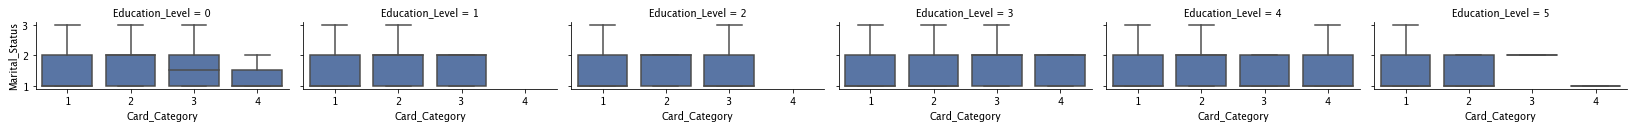

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
grid = sns.FacetGrid(training_data, col='Education_Level', height=1.9, aspect=2)
grid.map(sns.boxplot, 'Card_Category','Marital_Status', 'Education_Level', palette='deep', order=None, showfliers=True, hue_order=None)

This the boxplot shows for every Education Level what is the most frequent Marital Status with respect to each Card Category.

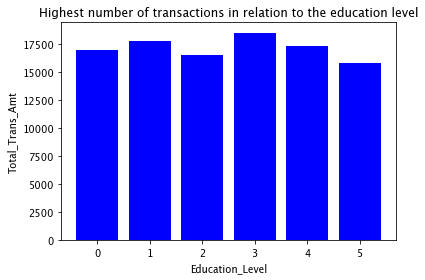

In [25]:
x = training_data['Education_Level']
y = training_data['Total_Trans_Amt']
plt.bar(x, y, color = "blue")
plt.xlabel("Education_Level")
plt.ylabel("Total_Trans_Amt")
plt.title("Highest number of transactions in relation to the education level")
plt.show()

This bar plot shows the number of transactions with respect to the education level.
It could be a witty combination to individuate clusters of people with similar education level and similar expenses making.

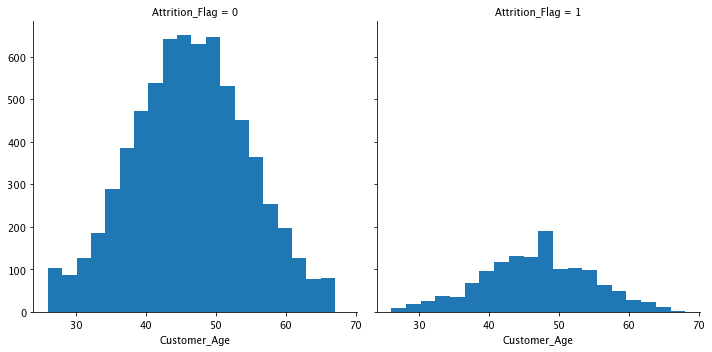

In [26]:
g = sns.FacetGrid(training_data, col='Attrition_Flag', height=5)
g.map(plt.hist, 'Customer_Age', bins=20)

This last plot shows with respect to the age how many customers decide to leave or hold their credit card program.

In [27]:
x_train = training_data.drop(["CLIENTNUM","Attrition_Flag"], axis=1).copy()
y_train = training_data["Attrition_Flag"]
x_test = testing_data.drop(["CLIENTNUM","Attrition_Flag"], axis=1).copy() 
y_test = testing_data["Attrition_Flag"]  

x_train.shape, x_test.shape

((8159, 16), (1968, 16))

### Model Training

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#### KNN

In [29]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'The accuracy of training data is {model.score(x_train, y_train) * 100}')
print(f'The accuracy of testing data is {model.score(x_test, y_test) * 100}')
cm = confusion_matrix(y_test, y_pred)
print(f'The precision of the model is {cm[0][0]/(cm[0][0]+cm[0][1])}')
print(f'The True Positive rate is {cm[0][0]/(cm[0][0]+cm[1][0])}')

The accuracy of training data is 97.6100012256404
The accuracy of testing data is 95.52845528455285
The precision of the model is 0.9808383233532935
The True Positive rate is 0.9669421487603306


#### Logistic Regression

In [30]:
model = LogisticRegression(max_iter=450)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'The accuracy of training data is {model.score(x_train, y_train) * 100}')
print(f'The accuracy of testing data is {model.score(x_test, y_test) * 100}')
cm = confusion_matrix(y_test, y_pred)
print(f'The precision of the model is {cm[0][0]/(cm[0][0]+cm[0][1])}')
print(f'The True Positive rate is {cm[0][0]/(cm[0][0]+cm[1][0])}')

The accuracy of training data is 94.50913102095845
The accuracy of testing data is 93.69918699186992
The precision of the model is 0.9646706586826347
The True Positive rate is 0.961217183770883


#### SVC

In [31]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'The accuracy of training data is {model.score(x_train, y_train) * 100}')
print(f'The accuracy of testing data is {model.score(x_test, y_test) * 100}')
cm = confusion_matrix(y_test, y_pred)
print(f'The precision of the model is {cm[0][0]/(cm[0][0]+cm[0][1])}')
print(f'The True Positive rate is {cm[0][0]/(cm[0][0]+cm[1][0])}')

The accuracy of training data is 91.56759406790049
The accuracy of testing data is 92.17479674796748
The precision of the model is 0.9916167664670659
The True Positive rate is 0.9220489977728286


#### Decision Tree

In [32]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'The accuracy of training data is {model.score(x_train, y_train) * 100}')
print(f'The accuracy of testing data is {model.score(x_test, y_test) * 100}')
cm = confusion_matrix(y_test, y_pred)
print(f'The precision of the model is {cm[0][0]/(cm[0][0]+cm[0][1])}')
print(f'The True Positive rate is {cm[0][0]/(cm[0][0]+cm[1][0])}')

The accuracy of training data is 100.0
The accuracy of testing data is 97.35772357723577
The precision of the model is 0.9844311377245509
The True Positive rate is 0.9844311377245509


#### Random Forest

In [33]:
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'The accuracy of training data is {model.score(x_train, y_train) * 100}')
print(f'The accuracy of testing data is {model.score(x_test, y_test) * 100}')
cm = confusion_matrix(y_test, y_pred)
print(f'The precision of the model is {cm[0][0]/(cm[0][0]+cm[0][1])}')
print(f'The True Positive rate is {cm[0][0]/(cm[0][0]+cm[1][0])}')

The accuracy of training data is 100.0
The accuracy of testing data is 97.76422764227642
The precision of the model is 0.9904191616766467
The True Positive rate is 0.9833531510107015


In [34]:
y_pred = model.predict(x_test)
result_df = pd.DataFrame({'CLIENTNUM': testing_data['CLIENTNUM'].values, 'Attrition_Flag': y_pred})
result_df.head()


,CLIENTNUM,Attrition_Flag
0,818906208,0
1,710930508,0
2,719661558,0
3,710599683,0
4,771071958,0


## Experimental Design:
As briefly introduced before, we first tried to understand the request: the problem assigned was to predict a binary category: leave or not leave. Consequently, the range of algorithms to use was highly restricted. Our target algorithms were KNN and Random Forests for the reasons we listed in section ‘Introduction’. KNN is a well- known classification algorithm which samples the data into different categories working like this:

1)Choose number k(odd)
2)Take k nearest neighbors to data-point
3)Count the number of neighbors belonging to each category
4)Assign the new data point to the category where you counted the most neighbors.

In our opinion this algorithm matched with the request because it outputs a categorical answer since permits to assign datapoints to specific groups and can efficiently deal, in terms of time, with our dataset. As expected, this algorithm produced a very high accuracy.
Second target algorithms, which output highest accuracy, were Random Forests:
This algorithm shows ensemble learning, works by building many cart trees, make the model less interpretable. It works like this:
To make prediction each tree votes an outcome and pick the outcome that receives most votes.
1) Pick at random k data points on the training set
2) Build the decision trees associated to these k data points
3) Choose the number of trees you want to build and then do it again
4) To predict a Y value for a new data point, make each of the n trees choose an outcome Y for the
datapoint and assign the new data point the average across all the predicted y values

Each tree can split just on a random subset of variables and is built from a bootstrapped sample of the data. To grant meaningful results, we tried to solve the problem using completely different approaches: Logistic regression, SVM, Decision Trees. In Fact, none of these algorithms showed better results than the ones of our target algorithms.

To compare the algorithms, we applied 3 different metrics: Accuracy, Precision and True positivity rate. We chose accuracy since it is the most reliable index: it shows what’s the efficiency of our predictions. Precision because accuracy may be inappropriate for imbalanced classification problems, even if it is not the case, as double check. And finally True positivity rate because what is important for us is to predict if clients will leave.

## Conclusions: 

From our work we denote that there exist several algorithms which could answer the problem but the algorithm which best fits the request of the bank with regards to the prediction of the client’s action is Random Forests, with results:

The accuracy of training data is 100.0
The accuracy of testing data is 97.76422764227642
The precision of the model is 0.9904191616766467
The True Positive rate is 0.9833531510107015


A question that may not be fully answered is which category of clients is going to leave the credit card service. Through the application of the models, we predict who will leave the service, but not to which category most of these people belong to. For example, if the people who are not satisfied about their service are of a particular age, gender or have a specific salary range.